* **her below is the code written by kaggle when we click on new notebook in perticular dataset.It is pedifinded code which gives us the address of the dataset.**
* **In your case either directly use dataset from kaggle or change the path in read_csv() function if you want to use it extenally.**

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Churn_Modelling.csv


In [7]:
df=pd.read_csv("/kaggle/input/Churn_Modelling.csv")
df.head()

#reading datafile

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* as of now for making basic neural network we delete RowNumber,CustomerId and Surname column
* as RowNumber and CustomerId are not required and Surname to not make data complecated as of now
* **Here our only purpose is to understand how bunary class classification is done in ANN**

In [8]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

#dropping 

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding

* as Geography and Gender do not have ordinal property so we have to do Nominal Ecoding
* for column Geography and Gender we have to do one hot encoding

In [10]:
df["Geography"].value_counts()

#see what are the different value are present in Geography column

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df["Gender"].value_counts()

#see what are the different value are present in Gender column

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
df.head()

#perfoming one hot encoding using get_dummies function of pandas

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


* **Here the value Balance, EstimatedSalart are too high so it take more computational cost so it is advisable to convert it into proper scale.**

# Scalling

* **In simple word scalling means we devide whole data with appropriate number to reduse number value.This appropriate number is selected by scalling class itself.**

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

* when we doesn't know about upper bound and lower bound of any column then it is peferable to use StanderdScaler class for scalling.

In [14]:
x=df.drop(columns=["Exited"])
x.head()

#seperate x from df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [15]:
y=df["Exited"]
y.head()

#seperate y from df

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

* we are doing scalling only on input data not on output data so we seperate input and output cloumns.

In [16]:
x=sc.fit_transform(x)
x

#scalling of x

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [17]:
y=y.to_numpy()
y

#convert y into array from dataframe

array([1, 0, 1, ..., 1, 1, 0])

* splitting training data and testing data form main data

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#seperate training data and testing data

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


* **Here I am using keras library of Tesorflow framework to implement ANN**

In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#when want to train model sequentially then we use Sequential class
#Dense class is used to establish fully connected network

2024-05-29 11:36:23.627708: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 11:36:23.627862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 11:36:23.786837: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#model architecture
#11 node/neurons in oth layer
#11 node in 1st layer
#1 node in 2nd layer

#if we solve binary class classification then either we use softmax or sigmoid activaion fuction in the last layer
# and if we use sigmoid activation function then in that layer node has to be 1

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

#see model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

* formula to calculae trainable perameter for perticular layer,
* **no_of_pevious_layer_nodes * no_of_currunt_layer_nodes + no_of_currunt_layer_nodes**
* in 0th layer: 
* trainable perameter= 11*11 + 11 =132
* mapping, 11= no_of_input columns as previous layer is input layer
*          11= no_of_currunt_layer_nodes(layer 0)
*          11= no_of_currunt_layer_nodes(layer 0)
* in 1st layer:
* trainable perameter= 11(Layer 0)*11(Layer 1) +11(Layer 1)=132
* in 2nd layer:
* trainable perameter= 11(Layer 1)*1(Layer 2) + 1(Layer 2)=12
* **Total trainable perameters in the model= 132 + 132 + 12 = 276**



In [23]:
model.compile(loss="binary_crossentropy",optimizer='Adam',metrics=["accuracy"])

#when we doing binary class classification then loss should be binary_crossentropy
#if select optimizer as Adam
#metrics=['accuracy']
#when I want to show accuracy along with loss during training the I have to pass dictionary like this

In [24]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

#model training and store model in history

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7259 - loss: 0.5682 - val_accuracy: 0.8194 - val_loss: 0.4330
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4493 - val_accuracy: 0.8238 - val_loss: 0.4151
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8114 - loss: 0.4295 - val_accuracy: 0.8263 - val_loss: 0.4047
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.4251 - val_accuracy: 0.8319 - val_loss: 0.3948
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.4126 - val_accuracy: 0.8331 - val_loss: 0.3870
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.4026 - val_accuracy: 0.8469 - val_loss: 0.3771
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.3877 - val_accuracy: 0.8469 - val_loss: 0.3687
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3725 - val_accu

* validation_split = 0.2
* it is one technique where we take part of data from training data and while traning (while training goes on) we done testing on that data. 
* performance of this type of testing is measured by val_loss and val_accuracy

In [25]:
model.layers[0].get_weights()

#printing all the weights of layer 0

[array([[ 0.11686772,  0.08347138, -0.10552501, -0.22480382,  0.16880675,
         -0.33003336, -0.19265123, -0.17787865, -0.26308095, -0.35080326,
          0.26845357],
        [-0.87301356, -0.6029747 ,  0.4327696 , -0.679283  , -0.10819361,
          0.74879473,  1.1407477 , -0.56887114,  0.05051531,  0.16852356,
         -0.11806078],
        [-0.23732722, -0.16414022, -0.0764271 ,  0.0383792 , -0.25167412,
          0.20571513, -0.04494182, -0.3096722 ,  0.6312398 , -0.23999505,
         -0.10730327],
        [-0.5293608 , -0.13695878, -0.34698072, -0.15601529, -0.38058653,
          0.4610103 , -0.20318781,  0.13449156, -0.7119473 ,  0.66557163,
         -0.27602988],
        [-0.05291272,  0.00448808, -1.1139941 , -0.20558031,  0.30525464,
         -0.47451577, -0.13721679, -0.01290119, -0.0124767 ,  0.8274256 ,
          1.2910228 ],
        [-0.18955688, -0.03534566,  0.02337334, -0.09046509,  0.05247222,
         -0.12137841,  0.15545925,  0.1108531 , -0.03848219, -0.0449364

In [26]:
model.layers[1].get_weights()

#getting all the weights of layer 1

[array([[-5.51183820e-01, -1.01968884e+00, -7.20662996e-04,
          5.49581796e-02,  3.23455006e-01, -5.22538200e-02,
         -2.33024031e-01,  4.61033702e-01,  6.26204610e-01,
         -5.41172504e-01, -5.87331355e-01],
        [ 4.83330131e-01, -1.78121626e-01,  6.74053431e-01,
          4.69833046e-01,  1.11347951e-01, -3.00532430e-01,
         -7.49708533e-01, -2.58680969e-01,  7.38902628e-01,
          1.32137593e-02, -1.34775832e-01],
        [-4.68727946e-01, -3.68287921e-01, -2.53284633e-01,
         -4.49371040e-01, -4.26923633e-01,  4.93229806e-01,
          3.57160494e-02, -4.60958511e-01, -4.29462075e-01,
          8.20115328e-01, -5.51116988e-02],
        [ 4.08167601e-01, -9.50334132e-01,  5.61789393e-01,
          4.88794923e-01, -5.30569077e-01, -4.16334897e-01,
          1.21654039e-02, -3.07135396e-02, -7.75624216e-01,
          4.64494936e-02,  4.48584288e-01],
        [ 3.06739330e-01,  2.29275733e-01, -4.71564472e-01,
          2.04226628e-01, -9.59258899e-03, -

In [27]:
model.layers[2].get_weights()

#getting all the weights of layer 2

[array([[-1.0089583 ],
        [ 2.5607939 ],
        [ 1.2874193 ],
        [-0.7209463 ],
        [-0.37577584],
        [ 0.62739414],
        [ 0.85688823],
        [-0.734222  ],
        [-0.5246167 ],
        [ 1.6395862 ],
        [-0.8213137 ]], dtype=float32),
 array([0.01463629], dtype=float32)]

In [28]:
z=model.predict(x_test)
z

#testing the model
#z is the probability of 1
#1-z is the probability of 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.0083147 ],
       [0.04958318],
       [0.06979649],
       ...,
       [0.01087654],
       [0.01277269],
       [0.1324662 ]], dtype=float32)

In [29]:
y_predict=np.where(z>0.5,1,0)
y_predict

#generalize probability in 0 or 1
#if z>0.5 then 1 otherwise 0

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

#when we do classification task then we use accuracy_score as the measure of our model

0.8455


In [31]:
history.history

#history is the perameter of of history object in which our model is stored
#it gives us 
# 1) training accuracy
# 2) training loss
# 3) testing accuracy
# 4) testing loss

{'accuracy': [0.7696874737739563,
  0.7990624904632568,
  0.8079687356948853,
  0.8179687261581421,
  0.8278124928474426,
  0.8364062309265137,
  0.8431249856948853,
  0.8506249785423279,
  0.8525000214576721,
  0.8537499904632568,
  0.8582812547683716,
  0.8565624952316284,
  0.8607812523841858,
  0.862500011920929,
  0.8628125190734863,
  0.8628125190734863,
  0.8618749976158142,
  0.8623437285423279,
  0.8617187738418579,
  0.8635937571525574,
  0.8615624904632568,
  0.86328125,
  0.8639062643051147,
  0.8650000095367432,
  0.8643749952316284,
  0.8637499809265137,
  0.8650000095367432,
  0.8646875023841858,
  0.8646875023841858,
  0.8651562333106995,
  0.8671875,
  0.8653125166893005,
  0.8653125166893005,
  0.8654687404632568,
  0.8657812476158142,
  0.8656250238418579,
  0.8657812476158142,
  0.8643749952316284,
  0.8667187690734863,
  0.8657812476158142,
  0.8645312786102295,
  0.8656250238418579,
  0.8659374713897705,
  0.8653125166893005,
  0.866406261920929,
  0.8664062619209

In [32]:
import matplotlib.pyplot as plt

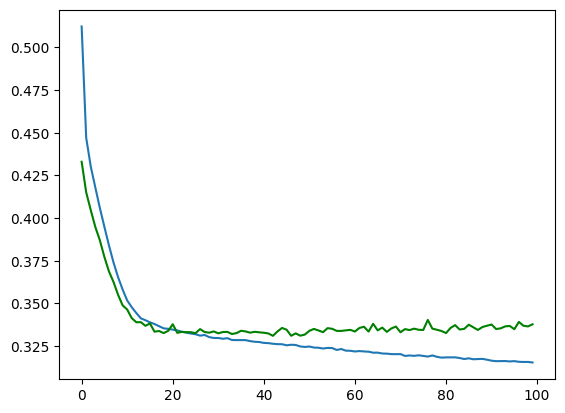

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color="green")

#plotting graph between training loss and epochs, validation loss and epochs

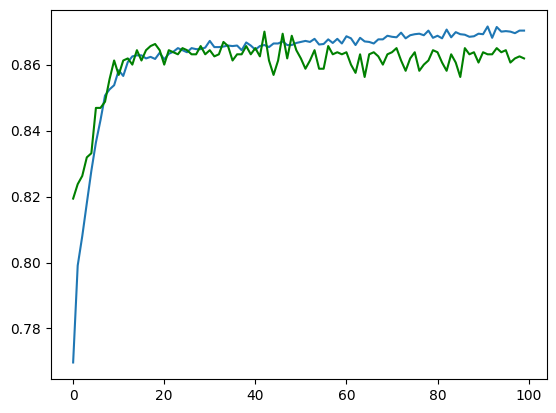

In [34]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"],color="green")

#making graph between training accuracy v/s epochs and validation accuracy and epochs